In [1]:
import urllib.request
import nltk   
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
from gensim import corpora
from collections import Counter
import os
import locale

import string
from collections import Counter

In [3]:
from nltk.corpus import gutenberg


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
locale.setlocale(locale.LC_ALL, 'en_US')

'en_US'

In [6]:
#Loading in the newspaper files...
    # i helps iterate through the page number
    # j helps with iterating the day (ie. Jan 21, Jan 22)
    # k helps with the month number
    # l is for the year

text = ''

succ = 0
fail = 0

#for l in range(870,924):
for k in range(1,4):
    if k<10: k = '0' + str(k)
    for j in range(1,32):
        if j<10: j = '0' + str(j)
        for i in range(1,13):
            i, j, = str(i), str(j)
            url = "http://chroniclingamerica.loc.gov/lccn/sn83030313/1870-"+ k +"-"+ j +"/ed-1/seq-" + i +"/ocr.txt"
            try:
                html = urlopen(url).read()
                soup = BeautifulSoup(html, "lxml")
                text += str(soup)
                succ += 1
            except: 
                fail += 1


#print(text)

print("\n"+"*"*40+"\n"+"You have imported " + str(locale.format("%d", len(text), grouping=True)) + " characters." +"\n"+ str("{0:.3f}".format((succ*100)/(fail + succ))) + "% of your articles loaded."+"\n"+"*"*40)


****************************************
You have imported 52,762,387 characters.
87.814% of your articles loaded.
****************************************


In [9]:
cleaner_text = re.sub('<.+?>', '', text)

cleaner_text = nltk.word_tokenize(cleaner_text)

print(cleaner_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [13]:
print("There are " + locale.format("%d", len(cleaner_text), grouping=True) + " words in your collection.")

There are 9,166,756 words in your collection.


In [14]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andrewvangilder/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrewvangilder/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
#A common source of noise is a number of characters followed by a period (ie. ee. or r.)

cleaner_text = [re.sub('\w*(?=\.)','', word) for word in cleaner_text]

In [16]:
words_to_clean = list(string.punctuation) + list(string.digits) + list(string.ascii_lowercase) + nltk.corpus.stopwords.words("english") + ['...','gt','ii','ou','j.','a.','m.','oi',"'s",'aa',"''",'la','l','lu','lor','tho','ihe','1', 'tbe','ith','ol','ot','tue','vvnonislu', 'ulv','tne', 'aud', '``']


In [17]:
caesar = gutenberg.words('shakespeare-caesar.txt')

#caesar

In [18]:
emma = gutenberg.words('austen-emma.txt')

#emma[20:30]

In [19]:
texts = [word.lower() for word in cleaner_text if word.lower() not in words_to_clean]

#more_clean_text = [word.lower() for word in texts if word.lower() in caesar[:3000]]

#texts

In [20]:
most_common = Counter(texts).most_common()[:10]
most_common

[('street', 27256),
 ('new', 20459),
 ('city', 13875),
 ('one', 13456),
 ('lt', 12523),
 ('two', 12269),
 ('house', 11076),
 ('york', 10078),
 ('good', 9671),
 ('would', 8963)]

In [21]:
dictionary = dict(Counter(texts))

In [55]:
wordlist = ['street','thing']
s = []

In [59]:
#The start of some comparative text analysis

for word in emma:
        if word in dictionary:
            if dictionary[word] > 4000:
                if word not in s:
                    s.append(word)
            
#print(s)

In [60]:
sorted_word_counts = sorted(list(Counter(texts).values()), reverse=True)

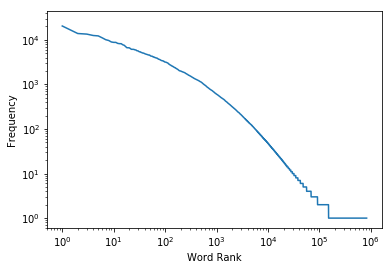

In [23]:
plt.loglog(sorted_word_counts)
plt.ylabel("Frequency")
plt.xlabel("Word Rank")